## Intro to Regression

[intro desmos](https://www.desmos.com/calculator/ywloazwete)

Goals:
- use statsmodels to build a regression model
- use summary statistics to evaluate a model
- differentiate between corr, cov, and R squared

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols # ordinary list squre
import matplotlib.pyplot as plt
plt.style.use('seaborn')

`.cov` , `.corr`

[link to dataset](https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv)

In [2]:
class_data = pd.read_csv('https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv',header=None)
class_data.columns = ['x','y']
print(class_data.cov())
print(class_data.corr())

            x           y
x   94.991910  125.620248
y  125.620248  277.495208
          x         y
x  1.000000  0.773728
y  0.773728  1.000000


In [4]:
class_data.shape

(100, 2)

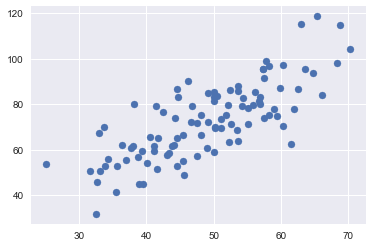

In [5]:
plt.scatter(class_data.x, class_data.y)

In [6]:
f = "y~x"

In [7]:
model = ols(formula=f, data=class_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     146.2
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           3.86e-21
Time:                        16:15:48   Log-Likelihood:                -377.03
No. Observations:                 100   AIC:                             758.1
Df Residuals:                      98   BIC:                             763.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9910      5.459      1.464      0.146      -2.842      18.824
x              1.3224      0.109     12.090      0.000       1.105       1.539
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.808
Skew:                           0.148   Prob(JB):                        0.668
Kurtosis:                       2.674   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Beginner
### Problem One: Chopsticks
#### Is chopstick length correlated with effectiveness?

In [ ]:
chopsticks = pd.read_csv("http://blog.yhat.com/static/misc/data/chopstick-effectiveness.csv")

In [ ]:
f = "y~x"
chopsticks.head()

In [ ]:
f_c = "y~x"
model = ols(formula=f_c, data=class_data).fit()
model.summary()

[Link to chopsticks study](https://www.ncbi.nlm.nih.gov/pubmed/15676839)

## Intermediate:
### Problem Three: Street price of weed
[reference](http://blog.yhat.com/posts/7-funny-datasets.html)

Has the price of weed been trending downward or upward over time? 
- overall?
- different in certain states?
- different qualities?

In [ ]:
weed = pd.read_csv("http://blog.yhat.com/static/misc/data/marijuana-street-price-clean.csv")

In [ ]:
weed.head()

## Advanced
### DC housing
### Doing repeat OLS, which variables are related to housing price?

In [2]:
housing = pd.read_csv("https://drive.google.com/uc?export=download&id=1DsbpIf4_9CAKNd-B9gaML1WKOJcMne71")
pd.set_option('display.max_columns', None)
yr_rmdl = housing[['YR_RMDL','PRICE']]

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cleaned = yr_rmdl.dropna()
cleaned.head()

,YR_RMDL,PRICE
0,1988.0,1095000.0
2,2009.0,2100000.0
3,2003.0,1602000.0
7,2011.0,1050000.0
8,2008.0,1430000.0


In [4]:
cleaned.YR_RMDL.dtype
cleaned.PRICE.dtype

dtype('float64')

In [5]:
f_h = "YR_RMDL~PRICE"

In [6]:
f_h = "YR_RMDL~PRICE"
model = ols(formula=f_h, data=cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                YR_RMDL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     52.20
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.07e-13
Time:                        15:50:13   Log-Likelihood:            -2.4221e+05
No. Observations:               57674   AIC:                         4.844e+05
Df Residuals:                   57672   BIC:                         4.844e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2000.6009      0.068   2.95e+04      0.000    2000.468    2000.734
PRICE       5.284e-08   7.31e-09      7.225      0.000    3.85e-08    6.72e-08
==============================================================================
Omnibus:                   156705.957   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      37341029141.510
Skew:                         -32.807   Prob(JB):                         0.00
Kurtosis:                    3944.382   Cond. No.                     9.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
housing.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [8]:
pr_sq = housing[['PRICE','SQUARE']]
pr_clean = pr_sq.dropna()
pr_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98216 entries, 0 to 158955
Data columns (total 2 columns):
PRICE     98216 non-null float64
SQUARE    98216 non-null object
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [9]:
f = "PRICE~SQUARE"

In [10]:
model = ols(formula=f, data=pr_clean).fit()
model.summary()

ValueError: mismatch between column_names and columns coded by given terms

In [ ]:
numeric_cols = []
for col in housing:
    if housing[col].dtype=='float64' or housing[col].dtype=='int64':
        numeric_cols.append(col)

In [ ]:
r_sq_list = []
for i in numeric_cols:
    f = f"PRICE~{col}"
    temp_housing = housing.loc[housing[i].isna()==False]
    model = ols(formula=f, data=temp_housing).fit()
    r_sq_list.append((i,model.rsquared))

In [ ]:
r_sq_list